In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import h5py
import modred as mr
import numpy.matlib as ml
import scipy.interpolate as interp

In [8]:
f = h5py.File('/Users/Owen/Dropbox/Data/ABL/SBL PIV data/RNV45-RI2.mat')
#list(f.keys())

#swirl = np.asarray(f['Swirl'])
X  = np.asarray(f['X'])
Y  = np.asarray(f['Y'])
U  = np.asarray(f['U'])
V  = np.asarray(f['V'])

U = np.transpose(U,(2,1,0))
V = np.transpose(V,(2,1,0))
X = np.transpose(X,(1,0))
Y = np.transpose(Y,(1,0))


In [9]:
#Rearange data into correct shape (rows all the data for a single snapshot, columns each shapshot)
uSize = U.shape
uSize

(123, 242, 750)

In [10]:
#Do 2D interpolation to remove any NaNs or find locations of NaNs 
#for i in range(uSize[2]):
#    U[:,:,i] = interp.interp2d(X, Y, U[:,:,i], kind='linear')

#Find the locations of all NaNs
NanLocs = np.isnan(U)
#U[NanLocs] = 0
    

In [11]:
#Calculate mean velocity profiles
Umean = np.mean(np.nanmean(U,axis=2),axis = 1)
Umean
Umean.shape

Umean = np.transpose(np.tile(Umean,(uSize[2],uSize[1],1)),(2,1,0))
#Umean.shape

#Subtract mean velocity profiles from velocity fields
Uf = U - Umean;
Vf = V; #<--Mean in vertical is aprox zero
del Umean

In [13]:
#Set all NaNs to zero so that POD can run
Uf[NanLocs] = 0
Vf[NanLocs] = 0

In [106]:
# Test shape of matrix needed for POD function
num_vecs = 50;  #<-- equivalent to the number of PIV snapshots (Also number of total POD modes)

vecs = np.random.random((100, num_vecs))
vecs.shape

(100, 50)

In [14]:
uAll = np.concatenate((Uf.reshape(uSize[0]*uSize[1],uSize[2]), Vf.reshape(uSize[0]*uSize[1],uSize[2])), axis = 0)
uAll.shape      

(59532, 750)

In [15]:
num_modes = 50;
modes, eig_vals = mr.compute_POD_matrices_snaps_method(uAll, list(range(num_modes)))

In [23]:
menergy = eig_vals/np.sum(eig_vals)

In [91]:
#Rearrange mode data to get mode fields
modeSize = modes.shape
Umodes = modes[0:uSize[0]*uSize[1],:];
Vmodes = modes[uSize[0]*uSize[1]+1:modeSize[0]+1,:];
Umodes.shape

#for i in range(num_modes):
i=1
Umodes = np.reshape(Umodes[:,i],(uSize[0],uSize[1]))
#Umodes = np.reshape(Umodes,(uSize[0],uSize[1],num_modes))
Umodes.shape
#uSize[0]*uSize[1]

(123, 242)

[0, 0.32066559195518496, 0, 0.15978917145729066]

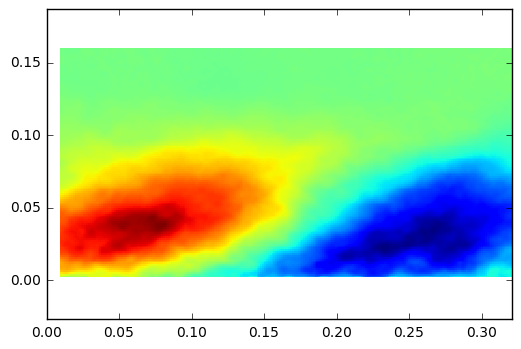

In [100]:
plt.figure()
plt.pcolor(X,Y,np.array(Umodes));
#plt.clim([-50, 50])
plt.axis('equal')
plt.axis([0, X.max(), 0, Y.max()])

fig, ax = plt.subplots()
ax.bar(range(num_modes),menergy[1:num_modes]*100)

In [77]:
modes.shape

(59532, 50)

In [80]:
a = np.arange(18).reshape(9,2)
b = a.reshape(3,3,2)
b

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]]])